In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('범죄와의전쟁.xlsx', index_col=0)
df2 = pd.read_excel('광해.xlsx', index_col=0)
df3 = pd.read_excel('내부자들.xlsx', index_col=0)
df4 = pd.read_excel('더킹.xlsx', index_col=0)
df1

,review,score,sentiment
0,영화 어제 봤습니다. 80~90년대 부산에 산 사람만이 알 수 있는 표현들이 너무 ...,10,1
1,ㅂㅈㅇㅇㅈㅈ 아~ 부산냄새~ 나는 서울 출신 이라서 무슨말하는지 이해안감,0,0
2,조폭영화중 최고 최민식이 다 살렸다,6,1
3,NaN,7,1
4,프리비에트 돌았네~~,9,1
...,...,...,...
4675,미치겠다.. 도대체 언제 개봉이냐?? ㅎ,10,1
4676,캐스팅 쩐다 진짜....ㄷㄷㄷㄷ,10,1
4677,이영화 대박날듯!!!!!!!!!!!!!!!!!!!!!!!100,10,1
4678,부산 촬영현장을 봤는데....두배우의 카리스마..대단합니다.,10,1


In [3]:
df1 = df1.dropna(axis=0)
df2 = df2.dropna(axis=0)
df3 = df3.dropna(axis=0)
df4 = df4.dropna(axis=0)
df1

,review,score,sentiment
0,영화 어제 봤습니다. 80~90년대 부산에 산 사람만이 알 수 있는 표현들이 너무 ...,10,1
1,ㅂㅈㅇㅇㅈㅈ 아~ 부산냄새~ 나는 서울 출신 이라서 무슨말하는지 이해안감,0,0
2,조폭영화중 최고 최민식이 다 살렸다,6,1
4,프리비에트 돌았네~~,9,1
5,살아있네~~,9,1
...,...,...,...
4675,미치겠다.. 도대체 언제 개봉이냐?? ㅎ,10,1
4676,캐스팅 쩐다 진짜....ㄷㄷㄷㄷ,10,1
4677,이영화 대박날듯!!!!!!!!!!!!!!!!!!!!!!!100,10,1
4678,부산 촬영현장을 봤는데....두배우의 카리스마..대단합니다.,10,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
review1_train, review1_test = train_test_split(df1['review'], test_size=.2, random_state=1234)

In [6]:
review1_train.shape

(1463,)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv1 = CountVectorizer(stop_words='english', max_features=2000)

In [9]:
x1_train = cv1.fit_transform(review1_train)

In [10]:
x1_test = cv1.fit_transform(review1_test)

In [11]:
import joblib

data1 = {
    'x1_train': x1_train, 
    'x1_test': x1_test,
    'cv1': cv1
}
joblib.dump(data1, 'review1.pkl')

['review1.pkl']

In [12]:
data1 = joblib.load('review1.pkl')
locals().update(data1)

In [13]:
x1_train.shape

(1463, 2000)

In [14]:
from sklearn.decomposition import TruncatedSVD

In [15]:
svd1 = TruncatedSVD(n_components=10, random_state=1234)
svd1.fit(x1_train)

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
             random_state=1234, tol=0.0)

In [16]:
import matplotlib.pyplot as plt

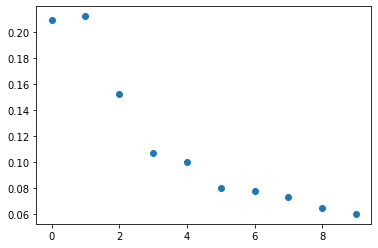

In [17]:
plt.plot(svd1.explained_variance_, 'o')

In [18]:
svd1 = TruncatedSVD(n_components=8, random_state=1234)
svd1.fit(x1_train)

TruncatedSVD(algorithm='randomized', n_components=8, n_iter=5,
             random_state=1234, tol=0.0)

In [19]:
joblib.dump(svd1, 'svd1.pkl')

['svd1.pkl']

In [20]:
doc_emb1 = svd1.transform(x1_test)

In [21]:
doc_emb1.shape

(366, 8)

In [22]:
svd1.components_.shape

(8, 2000)

In [23]:
loading1 = pd.DataFrame(svd1.components_.T)
loading1['word'] = cv1.get_feature_names()

In [24]:
i = 0
loading1.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
1136,0.584772,은근
1556,0.363587,중금
1876,0.356936,하지만
1724,0.333759,칭할
1087,0.256570,요소도


- 회전

In [25]:
from factor_analyzer.rotator import Rotator
rotator1 = Rotator()

In [26]:
rotated1 = rotator1.fit_transform(svd1.components_.T)

In [27]:
import pandas as pd
rloading1 = pd.DataFrame(rotated1)
rloading1['word'] = cv1.get_feature_names()

In [28]:
i = 0
rloading1.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
1876,0.699419,하지만
1724,0.624395,칭할
1092,0.107425,욕심이
1081,0.099306,왜이러지
1093,0.097674,욕이


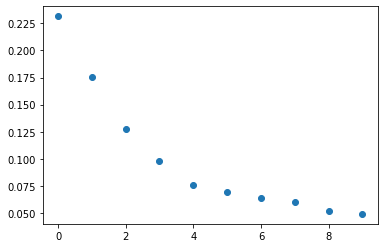

In [29]:
review2_train, review2_test = train_test_split(df2['review'], test_size=.2, random_state=1234)

cv2 = CountVectorizer(stop_words='english', max_features=2000)

x2_train = cv2.fit_transform(review2_train)
x2_test = cv2.fit_transform(review2_test)

data2 = {
    'x2_train': x2_train, 
    'x2_test': x2_test,
    'cv2': cv2
}

svd2 = TruncatedSVD(n_components=10, random_state=1234)
svd2.fit(x2_train)

plt.plot(svd2.explained_variance_, 'o')

In [30]:
svd2 = TruncatedSVD(n_components=6, random_state=1234)
svd2.fit(x2_train)

doc_emb2 = svd2.transform(x2_test)

loading2 = pd.DataFrame(svd2.components_.T)
loading2['word'] = cv2.get_feature_names()

i = 0
loading2.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
1220,0.824525,이병헌
1677,0.292502,코믹하면서
1400,0.204753,재미도
1183,0.134213,이래야한다는
327,0.111095,무엇보다


- 회전

In [31]:
rotator2 = Rotator()

rotated2 = rotator2.fit_transform(svd2.components_.T)

rloading2 = pd.DataFrame(rotated2)
rloading2['word'] = cv2.get_feature_names()

i = 0
rloading2.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
1220,0.956345,이병헌
756,0.059654,연기자네요
1736,0.059519,틀에서는
1491,0.057741,지루하고
615,0.032118,언제개봉하냐규ㅠㅠㅠㅠㅠ


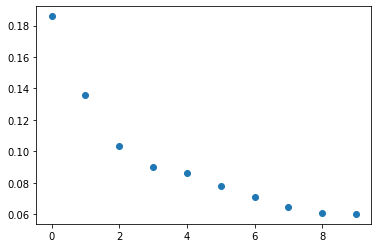

In [32]:
review3_train, review3_test = train_test_split(df3['review'], test_size=.2, random_state=1234)

cv3 = CountVectorizer(stop_words='english', max_features=1500)

x3_train = cv3.fit_transform(review3_train)
x3_test = cv3.fit_transform(review3_test)

data3 = {
    'x3_train': x3_train, 
    'x3_test': x3_test,
    'cv3': cv3
}

svd3 = TruncatedSVD(n_components=10, random_state=1234)
svd3.fit(x3_train)

plt.plot(svd3.explained_variance_, 'o')

In [33]:
svd3 = TruncatedSVD(n_components=8, random_state=1234)
svd3.fit(x3_train)

doc_emb3 = svd3.transform(x3_test)

loading3 = pd.DataFrame(svd3.components_.T)
loading3['word'] = cv3.get_feature_names()

i = 0
loading3.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
867,0.807323,없네
1289,0.275999,짖어대다가
1005,0.158278,웃고
194,0.133932,그런시대에
785,0.129271,아닐까


In [34]:
rotator3 = Rotator()

rotated3 = rotator3.fit_transform(svd3.components_.T)

rloading3 = pd.DataFrame(rotated3)
rloading3['word'] = cv3.get_feature_names()

i = 0
rloading3.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
867,0.953013,없네
403,0.082683,돼지말자
1482,0.051581,확실
32,0.051020,3시간이란
1386,0.044396,포기한


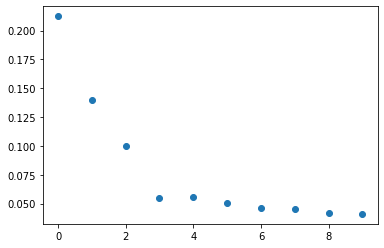

In [35]:
review4_train, review4_test = train_test_split(df4['review'], test_size=.2, random_state=1234)

cv4 = CountVectorizer(stop_words='english', max_features=2000)

x4_train = cv4.fit_transform(review4_train)
x4_test = cv4.fit_transform(review4_test)

data4 = {
    'x4_train': x4_train, 
    'x4_test': x4_test,
    'cv4': cv4
}

svd4 = TruncatedSVD(n_components=10, random_state=1234)
svd4.fit(x4_train)

plt.plot(svd4.explained_variance_, 'o')

In [36]:
svd4 = TruncatedSVD(n_components=6, random_state=1234)
svd4.fit(x4_train)

doc_emb4 = svd4.transform(x4_test)

loading4 = pd.DataFrame(svd4.components_.T)
loading4['word'] = cv4.get_feature_names()

i = 0
loading4.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
1253,0.878654,재미있다
342,0.227309,남자의
1625,0.183281,초딩나레이션과
1674,0.138466,친절해서
1219,0.114310,잡탕을


In [37]:
rotator4 = Rotator()

rotated4 = rotator4.fit_transform(svd4.components_.T)

rloading4 = pd.DataFrame(rotated4)
rloading4['word'] = cv4.get_feature_names()

i = 0
rloading4.sort_values(i, ascending=False).loc[:, [i, 'word']].head()

,0,word
1253,0.959842,재미있다
588,0.040358,봤지만
443,0.037591,매력을
783,0.032657,영구히
823,0.032433,영화속
